In [1]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x1, x2):
    return -(np.sin(x1) * np.cos(x2) * np.tan(x1 + x2) + 3/4 * np.exp(1 - np.sqrt(x1**2)))

In [2]:
def create_population(pop_size, bounds):
    return np.random.uniform(bounds[0], bounds[1], (pop_size, 2))

def evaluate_population(population):
    return np.array([objective_function(ind[0], ind[1]) for ind in population])

def tournament_selection(population, fitness, tournament_size=3):
    selected_parents = []
    for _ in range(len(population)):
        indices = np.random.choice(len(population), tournament_size)
        winner_index = indices[np.argmin(fitness[indices])]
        selected_parents.append(population[winner_index])
    return np.array(selected_parents)

def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, 2)
    child1, child2 = parent1.copy(), parent2.copy()
    child1[crossover_point:], child2[crossover_point:] = parent2[crossover_point:], parent1[crossover_point:]
    return child1, child2

def mutate(individual, mutation_rate=0.01, bounds=(-10, 10)):
    if np.random.rand() < mutation_rate:
        idx = np.random.randint(0, 2)
        individual[idx] = np.random.uniform(bounds[0], bounds[1])
    return individual

In [6]:
def genetic_algorithm(pop_size=50, generations=5, mutation_rate=0.1, bounds=(-10, 10)):
    population = create_population(pop_size, bounds)
    best_fitness_history = []

    for generation in range(generations):
        fitness = evaluate_population(population)
        parents = tournament_selection(population, fitness)

        next_generation = []
        for i in range(0, len(parents), 2):
            parent1, parent2 = parents[i], parents[i+1]
            child1, child2 = crossover(parent1, parent2)
            next_generation.extend([
                mutate(child1, mutation_rate),
                mutate(child2, mutation_rate)
            ])

        population = np.array(next_generation)
        best_fitness = np.min(fitness)
        best_fitness_history.append(best_fitness)

        best_individual = population[np.argmin(fitness)]
        print(f"Generation {generation+1}: Best Fitness = {best_fitness:.6f}, Best Individual = {best_individual}")

    # Plot grafik evolusi fitness
    plt.figure(figsize=(10, 5))
    plt.plot(best_fitness_history, label='Best Fitness per Generation', color='blue')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Evolusi Fitness Terbaik per Generasi')
    plt.legend()
    plt.grid(True)
    plt.show()

    final_fitness = evaluate_population(population)
    best_solution = population[np.argmin(final_fitness)]
    print(f"\nOptimal Solution: x1 = {best_solution[0]:.4f}, x2 = {best_solution[1]:.4f}, Fitness = {np.min(final_fitness):.6f}")

Generation 1: Best Fitness = -393.774498, Best Individual = [-1.02375671 -6.90782502]
Generation 2: Best Fitness = -13.617507, Best Individual = [1.78973846 4.45685425]
Generation 3: Best Fitness = -20.735735, Best Individual = [-4.91722439 -9.6087111 ]
Generation 4: Best Fitness = -22.320281, Best Individual = [-0.51099527 -0.26509793]
Generation 5: Best Fitness = -8.405179, Best Individual = [-0.51099527 -0.26509793]


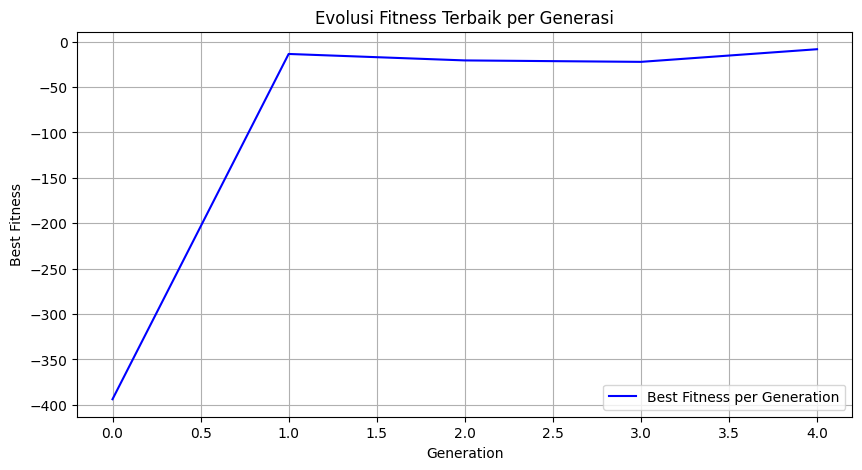


Optimal Solution: x1 = -0.5110, x2 = -1.0411, Fitness = -14.458636


In [7]:
# Run the Genetic Algorithm
genetic_algorithm(pop_size=50, generations=5, mutation_rate=0.1, bounds=(-10, 10))